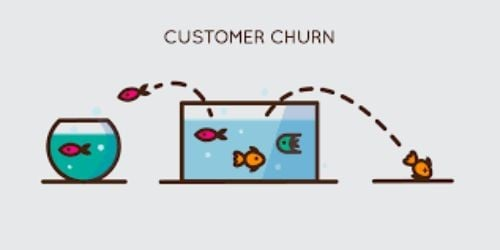

# Intro

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.


**Surname**: corresponds to the record (row) number and has no effect on the output.

**CreditScore**: contains random values and has no effect on customer leaving the bank.

**Geography**: a customer’s location can affect their decision to leave the bank.

**Gender**: it’s interesting to explore whether gender plays a role in a customer leaving the bank.

**Age**: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure**: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**NumOfProducts**: refers to the number of products that a customer has purchased through the bank.

**HasCrCard**: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

**IsActiveMember**: active customers are less likely to leave the bank.

**EstimatedSalary**: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited**: (Dependent Variable): whether or not the customer left the bank.

**Balance**: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

<h1><center><span style="font-family:Georgia;color:#E8DCCC;font-weight:bold;background:#97A37B"> 📚Installation Required for Spark

In [1]:
pip install sparkmagic

     |████████████████████████████████| 43 kB 664 kB/s 
     |████████████████████████████████| 121 kB 1.2 MB/s 
     |████████████████████████████████| 110 kB 3.0 MB/s 
     |████████████████████████████████| 1.2 MB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 39.8 MB/s 
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
    Preparing wheel metadata ... - done
  Created wheel for sparkmagic: filename=sparkmagic-0.19.1-py3-none-any.whl size=64701 sha256=7197cb46b2ffb4a55b7502327310a3ac64019c94402320688b513d2a36c8903e
  Stored in directory: /root/.cache/pip/wheels/77/00/d5/153197547803fa423ee3d0a7a1ff19f138cbcc385a5d11e0dd
  Created wheel for autovizwidget: filename=autovizwidget-0.19.1-py3-none-any.whl size=14544 sha256=611ce941cfca1211f62f62c255d46b1d71ed2b63f3441f1bb67a83648bb7b104
  Stored in directory: /root/.cache/pip/wheels/09/76/d9/ff313b7bd4ff55b1ff8c299f31889f525dc5129556853e1330
  Created wheel for hdi

In [2]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 66.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=b3322a4c0fe6c43c8c9d065b49f79cb40883830c1f96ce7848e4a2764ff9334c
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


<h1><center><span style="font-family:Georgia;color:#E8DCCC;font-weight:bold;background:#97A37B"> 📚Importing Libraries

In [3]:
# libraries
import warnings
# import findspark
import pandas as pd
import seaborn as sns
from pyspark.ml.classification import GBTClassifier, LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder, StandardScaler
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql import SparkSession
from pyspark.ml.feature import Bucketizer

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<h1><center><span style="font-family:Georgia;color:#E8DCCC;font-weight:bold;background:#97A37B"> 🪢Creating A Spark Session

In [4]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/11/11 23:45:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<h1><center><span style="font-family:Georgia;color:#E8DCCC;font-weight:bold;background:#97A37B"> 🔍Exploratory Data Analysis

In [5]:
spark_df = spark.read.csv('../input/churn-dataset', inferSchema=True, header=True)
spark_df.show(10)

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93826.63|

In [6]:
print("Shape: ", (spark_df.count(), len(spark_df.columns)))

Shape:  (10000, 14)


In [7]:
spark_df.printSchema() #types of Variables

root
 |-- RowNumber: integer (nullable = true)
 |-- CustomerId: integer (nullable = true)
 |-- Surname: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- HasCrCard: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: integer (nullable = true)



In [8]:
spark_df.show(5)

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93826.63|

In [9]:
spark_df.describe().show() #summary statistics

+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|summary|         RowNumber|       CustomerId|Surname|      CreditScore|Geography|Gender|               Age|            Tenure|          Balance|     NumOfProducts|          HasCrCard|     IsActiveMember|  EstimatedSalary|             Exited|
+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|  count|             10000|            10000|  10000|            10000|    10000| 10000|             10000|             10000|            10000|             10000|              10000|              10000|            10000|              10000|
|   mean|            5000.5|

In [10]:
spark_df.describe(["age", "exited"]).show() #summary statistics for specific variables

+-------+------------------+-------------------+
|summary|               age|             exited|
+-------+------------------+-------------------+
|  count|             10000|              10000|
|   mean|           38.9218|             0.2037|
| stddev|10.487806451704587|0.40276858399486065|
|    min|                18|                  0|
|    max|                92|                  1|
+-------+------------------+-------------------+



In [11]:
spark_df.groupby("exited").count().show() #class statistics of categorical variables

+------+-----+
|exited|count|
+------+-----+
|     1| 2037|
|     0| 7963|
+------+-----+



In [12]:
spark_df.select("exited").distinct().show() #unique classes

+------+
|exited|
+------+
|     1|
|     0|
+------+



In [13]:
spark_df.groupby("exited").count().show() #groupby transactions

+------+-----+
|exited|count|
+------+-----+
|     1| 2037|
|     0| 7963|
+------+-----+



In [14]:
spark_df.groupby("exited").agg({"tenure": "mean"}).show() #time spent

+------+-----------------+
|exited|      avg(tenure)|
+------+-----------------+
|     1|4.932744231713304|
|     0|5.033278914981791|
+------+-----------------+



In [15]:
#Selection and summary statistics of all numeric variables
num_cols = [col[0] for col in spark_df.dtypes if col[1] != 'string']
spark_df.select(num_cols).describe().show() 

+-------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|summary|         RowNumber|       CustomerId|      CreditScore|               Age|            Tenure|          Balance|     NumOfProducts|          HasCrCard|     IsActiveMember|  EstimatedSalary|             Exited|
+-------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|  count|             10000|            10000|            10000|             10000|             10000|            10000|             10000|              10000|              10000|            10000|              10000|
|   mean|            5000.5|  1.56909405694E7|         650.5288|           38.9218|            5.0128|76485.88928799961|        

In [16]:
#Selection and summary of all categorical variables
cat_cols = [col[0] for col in spark_df.dtypes if col[1] == 'string']
spark_df.select(cat_cols).describe().show() 

+-------+-------+---------+------+
|summary|Surname|Geography|Gender|
+-------+-------+---------+------+
|  count|  10000|    10000| 10000|
|   mean|   null|     null|  null|
| stddev|   null|     null|  null|
|    min|  Abazu|   France|Female|
|    max| Zuyeva|    Spain|  Male|
+-------+-------+---------+------+



In [17]:
# mean of numerical variables relative to the target variable
for col in [col.lower() for col in num_cols]:
    spark_df.groupby("exited").agg({col: "mean"}).show()

+------+-----------------+
|exited|   avg(rownumber)|
+------+-----------------+
|     1|4905.917525773196|
|     0|5024.694964209469|
+------+-----------------+

+------+--------------------+
|exited|     avg(customerid)|
+------+--------------------+
|     1|1.5690051964653904E7|
|     0|1.5691167881702876E7|
+------+--------------------+

+------+-----------------+
|exited| avg(creditscore)|
+------+-----------------+
|     1|645.3514972999509|
|     0|651.8531960316463|
+------+-----------------+

+------+-----------------+
|exited|         avg(age)|
+------+-----------------+
|     1| 44.8379970544919|
|     0|37.40838879819164|
+------+-----------------+

+------+-----------------+
|exited|      avg(tenure)|
+------+-----------------+
|     1|4.932744231713304|
|     0|5.033278914981791|
+------+-----------------+

+------+-----------------+
|exited|     avg(balance)|
+------+-----------------+
|     1|91108.53933726063|
|     0|72745.29677885193|
+------+-----------------+

+---

<h1><center><span style="font-family:Georgia;color:#E8DCCC;font-weight:bold;background:#97A37B"> ✍🏼Data Preprocessing & Feature Engineering


In [18]:
#Missing Values
from pyspark.sql.functions import when, count, col
spark_df.select([count(when(col(c).isNull(), c)).alias(c) for c in spark_df.columns]).toPandas().T

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [19]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])
spark_df.show(5)

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|rownumber|customerid| surname|creditscore|geography|gender|age|tenure|  balance|numofproducts|hascrcard|isactivemember|estimatedsalary|exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93826.63|

In [20]:
# Feature Interaction
spark_df = spark_df.drop('rownumber', "customerid", "surname")
spark_df = spark_df.withColumn('creditscore_salary', spark_df.creditscore / spark_df.estimatedsalary)
spark_df = spark_df.withColumn('creditscore_tenure', spark_df.creditscore * spark_df.tenure)
spark_df = spark_df.withColumn('balance_salary', spark_df.balance / spark_df.estimatedsalary)
spark_df.show(5)

+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+------------------+
|creditscore|geography|gender|age|tenure|  balance|numofproducts|hascrcard|isactivemember|estimatedsalary|exited|  creditscore_salary|creditscore_tenure|    balance_salary|
+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+------------------+
|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|0.006107615594765329|              1238|               0.0|
|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|0.005402399696186101|               608|0.7446769036217226|
|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|0.004406153623618106| 

In [21]:
#Bucketization / Bining / Num to Cat
spark_df.select('age').describe().toPandas().transpose()
spark_df.select("age").summary("count", "min", "25%", "50%","75%", "max").show()
bucketizer = Bucketizer(splits=[0, 35, 55, 75, 95], inputCol="age", outputCol="age_cat")
spark_df = bucketizer.setHandleInvalid("keep").transform(spark_df)
spark_df = spark_df.withColumn('age_cat', spark_df.age_cat + 1)

+-------+-----+
|summary|  age|
+-------+-----+
|  count|10000|
|    min|   18|
|    25%|   32|
|    50%|   37|
|    75%|   44|
|    max|   92|
+-------+-----+



In [22]:
#converting float values to integer
spark_df = spark_df.withColumn("age_cat", spark_df["age_cat"].cast("integer"))

In [23]:
#Label Encoding
#indexer = StringIndexer(inputCol="segment", outputCol="segment_label")
#indexer.fit(spark_df).transform(spark_df).show(5)
#temp_sdf = indexer.fit(spark_df).transform(spark_df)
#spark_df = temp_sdf.withColumn("segment_label", temp_sdf["segment_label"].cast("integer"))
#spark_df = spark_df.drop('segment')

In [24]:
indexer = StringIndexer(inputCol="gender", outputCol="gender_label")
indexer.fit(spark_df).transform(spark_df).show(5)
temp_sdf = indexer.fit(spark_df).transform(spark_df)
spark_df = temp_sdf.withColumn("gender_label", temp_sdf["gender_label"].cast("integer"))
spark_df = spark_df.drop('gender')

+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+------------------+-------+------------+
|creditscore|geography|gender|age|tenure|  balance|numofproducts|hascrcard|isactivemember|estimatedsalary|exited|  creditscore_salary|creditscore_tenure|    balance_salary|age_cat|gender_label|
+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+------------------+-------+------------+
|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|0.006107615594765329|              1238|               0.0|      2|         1.0|
|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|0.005402399696186101|               608|0.7446769036217226|      2|         1.0|
|        502|   France|Female|

In [25]:
spark_df.show(5)

+-----------+---------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+------------------+-------+------------+
|creditscore|geography|age|tenure|  balance|numofproducts|hascrcard|isactivemember|estimatedsalary|exited|  creditscore_salary|creditscore_tenure|    balance_salary|age_cat|gender_label|
+-----------+---------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+------------------+-------+------------+
|        619|   France| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|0.006107615594765329|              1238|               0.0|      2|           1|
|        608|    Spain| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|0.005402399696186101|               608|0.7446769036217226|      2|           1|
|        502|   France| 42|     8| 159660.8|            3|       

In [26]:
indexer = StringIndexer(inputCol="geography", outputCol="geography_label")
indexer.fit(spark_df).transform(spark_df).show(5)
temp_sdf = indexer.fit(spark_df).transform(spark_df)
spark_df = temp_sdf.withColumn("geography_label", temp_sdf["geography_label"].cast("integer"))
spark_df = spark_df.drop('geography')

+-----------+---------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+------------------+-------+------------+---------------+
|creditscore|geography|age|tenure|  balance|numofproducts|hascrcard|isactivemember|estimatedsalary|exited|  creditscore_salary|creditscore_tenure|    balance_salary|age_cat|gender_label|geography_label|
+-----------+---------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+------------------+-------+------------+---------------+
|        619|   France| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|0.006107615594765329|              1238|               0.0|      2|           1|            0.0|
|        608|    Spain| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|0.005402399696186101|               608|0.7446769036217226|      2|           1|  

In [27]:
#One Hot Encoding
encoder = OneHotEncoder(inputCols=["age_cat", "geography_label"], outputCols=["age_cat_ohe", "geography_label_ohe"])
spark_df = encoder.fit(spark_df).transform(spark_df)

In [28]:
#Defining Target
stringIndexer = StringIndexer(inputCol='exited', outputCol='label')

temp_sdf = stringIndexer.fit(spark_df).transform(spark_df)
temp_sdf.show()

+-----------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+------------------+-------+------------+---------------+-------------+-------------------+-----+
|creditscore|age|tenure|  balance|numofproducts|hascrcard|isactivemember|estimatedsalary|exited|  creditscore_salary|creditscore_tenure|    balance_salary|age_cat|gender_label|geography_label|  age_cat_ohe|geography_label_ohe|label|
+-----------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+------------------+-------+------------+---------------+-------------+-------------------+-----+
|        619| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|0.006107615594765329|              1238|               0.0|      2|           1|              0|(4,[2],[1.0])|      (2,[0],[1.0])|  1.0|
|        608| 41|     1| 83807.86|            1|        0|          

In [29]:
spark_df = temp_sdf.withColumn("label", temp_sdf["label"].cast("integer"))
spark_df.show(5)

+-----------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+------------------+-------+------------+---------------+-------------+-------------------+-----+
|creditscore|age|tenure|  balance|numofproducts|hascrcard|isactivemember|estimatedsalary|exited|  creditscore_salary|creditscore_tenure|    balance_salary|age_cat|gender_label|geography_label|  age_cat_ohe|geography_label_ohe|label|
+-----------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+------------------+------------------+-------+------------+---------------+-------------+-------------------+-----+
|        619| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|0.006107615594765329|              1238|               0.0|      2|           1|              0|(4,[2],[1.0])|      (2,[0],[1.0])|    1|
|        608| 41|     1| 83807.86|            1|        0|          

<div style="display:fill;
            border-radius: false;
            border-style: solid;
            border-color:#000000;
            border-style: false;
            border-width: 2px;
            color:#CF673A;
            font-size:15px;
            font-family: Georgia;
            background-color:#E8DCCC;
            text-align:center;
            letter-spacing:0.1px;
            padding: 0.1em;">

**<h2>♡ Thank you for taking the time ♡**

#  References

* https://github.com/mvahit

* https://www.kaggle.com/kemalgunay/pyspark-ml-churn-analysis